In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('/data/p_dsi/teams2023/team2/asurion_data/Asurion_data.xlsx')
print (data)

                     phone model phone size phone color  claim weeks_monday
0                   alcatel axel       32gb       black      1   2022-01-24
1                   alcatel axel       32gb       black      3   2022-11-14
2                   alcatel axel       32gb       black      1   2022-11-21
3                   alcatel axel       32gb       black      3   2022-11-28
4                   alcatel axel       32gb       black      1   2022-12-12
...                          ...        ...         ...    ...          ...
26656  samsung galaxy z fold3 5g      256gb      silver     17   2023-01-30
26657  samsung galaxy z fold3 5g      256gb      silver     26   2023-02-06
26658  samsung galaxy z fold3 5g      256gb      silver      4   2023-02-13
26659  samsung galaxy z fold3 5g      512gb       black     61   2023-02-06
26660  samsung galaxy z fold3 5g      512gb       black     16   2023-02-13

[26661 rows x 5 columns]


In [4]:
data.shape
data.head()

,phone model,phone size,phone color,claim,weeks_monday
0,alcatel axel,32gb,black,1,2022-01-24
1,alcatel axel,32gb,black,3,2022-11-14
2,alcatel axel,32gb,black,1,2022-11-21
3,alcatel axel,32gb,black,3,2022-11-28
4,alcatel axel,32gb,black,1,2022-12-12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26661 entries, 0 to 26660
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   phone model   26661 non-null  object        
 1   phone size    26661 non-null  object        
 2   phone color   26661 non-null  object        
 3   claim         26661 non-null  int64         
 4   weeks_monday  26661 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.0+ MB


In [6]:
data.describe()

,claim
count,26661.000000
mean,39.674281
std,62.150464
min,1.000000
25%,4.000000
50%,14.000000
75%,49.000000
max,566.000000


In [7]:
data['phone model']

0                     alcatel axel
1                     alcatel axel
2                     alcatel axel
3                     alcatel axel
4                     alcatel axel
                   ...            
26656    samsung galaxy z fold3 5g
26657    samsung galaxy z fold3 5g
26658    samsung galaxy z fold3 5g
26659    samsung galaxy z fold3 5g
26660    samsung galaxy z fold3 5g
Name: phone model, Length: 26661, dtype: object

In [8]:
data['phone model'].str.contains("iphone")

0        False
1        False
2        False
3        False
4        False
         ...  
26656    False
26657    False
26658    False
26659    False
26660    False
Name: phone model, Length: 26661, dtype: bool

In [9]:
#create new df of just iphone14 models
iphone14 = data[data['phone model'].str.contains("iphone 14")]
iphone14

,phone model,phone size,phone color,claim,weeks_monday
7939,apple iphone 14,128gb,black,7,2022-11-14
7940,apple iphone 14,128gb,black,11,2022-11-21
7941,apple iphone 14,128gb,black,15,2022-11-28
7942,apple iphone 14,128gb,black,25,2022-12-05
7943,apple iphone 14,128gb,black,20,2022-12-12
...,...,...,...,...,...
8002,apple iphone 14 pro max,128gb,gold,50,2023-02-06
8003,apple iphone 14 pro max,128gb,gold,18,2023-02-13
8004,apple iphone 14 pro max,128gb,purple,68,2023-02-06
8005,apple iphone 14 pro max,128gb,purple,24,2023-02-13


In [10]:
import numpy as np
np.unique(iphone['phone model'])

NameError: name 'iphone' is not defined

In [11]:
#least amount of claims in a week is 1, max is 71 claims in a week
#average amount of claims in a week for iphone14 was 11.868
iphone14.describe()

,claim
count,68.000000
mean,11.867647
std,14.799056
min,1.000000
25%,3.000000
50%,6.500000
75%,12.000000
max,71.000000


In [12]:
iphone[iphone['phone size'] == '128gb']

NameError: name 'iphone' is not defined

In [13]:
#less storage is more popular
iphone14["phone size"].value_counts()

128gb    35
256gb    29
512gb     4
Name: phone size, dtype: int64

In [14]:
#counts of colors of iphone14
#black and white are far more popular

iphone14["phone color"].value_counts()

black     31
white     26
blue       4
purple     3
gold       2
red        1
silver     1
Name: phone color, dtype: int64

<AxesSubplot:>

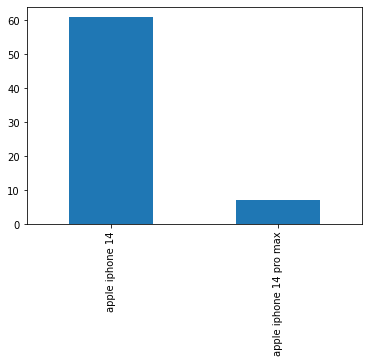

In [15]:
#claims for the different iphone 14 models

iphone14["phone model"].value_counts().head(10).plot(kind="bar")

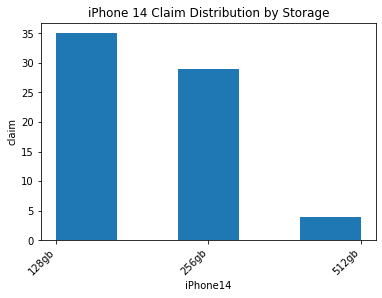

In [16]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()

#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(iphone14['phone size'],bins = 5)

#Labels and Tit
plt.title('iPhone 14 Claim Distribution by Storage')
plt.xlabel('iPhone14')
plt.ylabel('claim')
plt.xticks(rotation=45, ha='right')
plt.show()

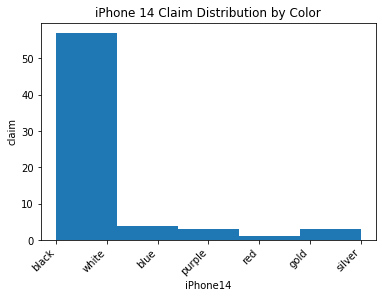

In [17]:
fig=plt.figure()

ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(iphone14['phone color'],bins = 5)

#Labels and Tit
plt.title('iPhone 14 Claim Distribution by Color')
plt.xlabel('iPhone14')
plt.ylabel('claim')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
new_iphone14 = iphone14.groupby(['phone color','phone size']).count()
new_iphone14
#find the different claims for all color/storage combinations of iphone 14

phone model  claim  weeks_monday
phone color phone size                                  
black       128gb                16     16            16
            256gb                12     12            12
            512gb                 3      3             3
blue        256gb                 4      4             4
gold        128gb                 2      2             2
purple      128gb                 2      2             2
            256gb                 1      1             1
red         256gb                 1      1             1
silver      128gb                 1      1             1
white       128gb                14     14            14
            256gb                11     11            11
            512gb                 1      1             1

In [21]:
iphone14['type'] = iphone14['phone color'] + ' ' + iphone14['phone size']
iphone14 =iphone14[['type','claim','weeks_monday']]
iphone14.head(20)

/tmp/ipykernel_77112/2583222705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone14['type'] = iphone14['phone color'] + ' ' + iphone14['phone size']


,type,claim,weeks_monday
7939,black 128gb,7,2022-11-14
7940,black 128gb,11,2022-11-21
7941,black 128gb,15,2022-11-28
7942,black 128gb,25,2022-12-05
7943,black 128gb,20,2022-12-12
7944,black 128gb,20,2022-12-19
7945,black 128gb,23,2022-12-26
7946,black 128gb,28,2023-01-02
7947,black 128gb,37,2023-01-09
7948,black 128gb,35,2023-01-16


In [23]:
iphone14["type"].value_counts()
#most claims are for black 128gb iphone 14

black 128gb     16
white 128gb     14
black 256gb     12
white 256gb     11
blue 256gb       4
black 512gb      3
gold 128gb       2
purple 128gb     2
purple 256gb     1
red 256gb        1
white 512gb      1
silver 128gb     1
Name: type, dtype: int64

In [25]:
# group the data by 'type'
grouped = iphone14.groupby('type')

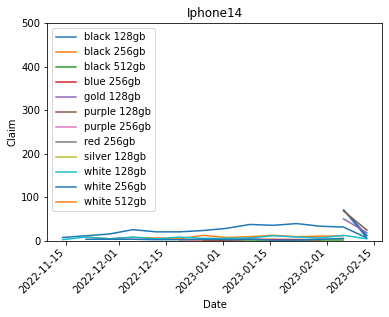

In [26]:
# plot the data for each group
for name, group in grouped:
    plt.plot(group['weeks_monday'],group['claim'], label=name)
    

# add a legend and labels for the x and y axis
plt.legend()
plt.xlabel('Date')
plt.ylabel('Claim')
plt.title('Iphone14')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 500)

# show the plot
plt.show()